In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy as scipy
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import Markdown as md


from school_data import schools, exams, ui

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
demo = schools.load_school_demographics()
tests = exams.load_math_ela_long()
demo

,dbn,beds,district,boro,school_name,short_name,ay,year,total_enrollment,grade_3k_pk_half_day_full,...,missing_race_ethnicity_data_pct,swd_n,swd_pct,ell_n,ell_pct,poverty_n,poverty_pct,eni_pct,clean_name,zip
0,01M015,310100010015,1,Manhattan,P.S. 015 Roberto Clemente,PS 15,2016,2016-17,178,17,...,0.000000,51,0.287000,12,0.067,152,0.854,0.882,roberto clemente,10009
1,01M015,310100010015,1,Manhattan,P.S. 015 Roberto Clemente,PS 15,2017,2017-18,190,17,...,0.000000,49,0.258000,8,0.042,161,0.847,0.890,roberto clemente,10009
2,01M015,310100010015,1,Manhattan,P.S. 015 Roberto Clemente,PS 15,2018,2018-19,174,13,...,0.000000,39,0.224000,8,0.046,147,0.845,0.888,roberto clemente,10009
3,01M015,310100010015,1,Manhattan,P.S. 015 Roberto Clemente,PS 15,2019,2019-20,190,14,...,0.000000,46,0.242000,17,0.089,155,0.816,0.867,roberto clemente,10009
4,01M015,310100010015,1,Manhattan,P.S. 015 Roberto Clemente,PS 15,2020,2020-21,193,17,...,0.000000,43,0.223000,21,0.109,158,0.819,0.856,roberto clemente,10009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,84X730,320800860846,84,Bronx,Bronx Charter School for the Arts,PS 730,2016,2016-17,320,0,...,0.000000,67,0.209375,51,0.159,235,0.734,0.840,bronx charter school for the arts,10474
9997,84X730,320800860846,84,Bronx,Bronx Charter School for the Arts,PS 730,2017,2017-18,314,0,...,0.000000,68,0.216561,57,0.182,258,0.822,0.891,bronx charter school for the arts,10474
9998,84X730,320800860846,84,Bronx,Bronx Charter School for the Arts,PS 730,2018,2018-19,430,0,...,0.000000,103,0.239535,71,0.165,363,0.844,0.888,bronx charter school for the arts,10474
9999,84X730,320800860846,84,Bronx,Bronx Charter School for the Arts,MS 730,2019,2019-20,523,0,...,0.000000,117,0.223709,69,0.132,453,0.866,0.892,bronx charter school for the arts,10474


In [6]:
df = demo[schools.demo.core_cols].merge(tests, how="inner", on=["dbn", "ay"])
df = df[df.mean_scale_score.notnull()]
# they changed the test scoring in 2017, so can't really be compared to earlier years
df = df[df.ay > 2016] 

# use the district code for charter, and make an int rather than boolean
# df.charter = df.district.apply(lambda x: 1 if x == 84 else 0)
df.charter


102       False
103       False
104       False
105       False
109       False
          ...  
420126     True
420127     True
420128     True
420129     True
420130     True
Name: charter, Length: 222010, dtype: bool

In [52]:
# T test
pub = df.query("charter == 0 and district <= 32")
charter = df.query("charter == 1")

t, p = scipy.stats.ttest_ind(pub["mean_scale_score"], charter["mean_scale_score"])


In [43]:

# print(sa.dbn.unique())
# print(charter.dbn.unique())
print("charter schools with tests", charter.dbn.nunique())
print("charter schools with demo", demo[demo.district == 84].dbn.nunique())
demo_charters = demo[(demo.district == 84) & (demo.ay.isin([2017, 2018]))]
charter_dbns = charter.dbn.unique()
demo_charters[~demo_charters.dbn.isin(charter_dbns)][["dbn","school_name"]].drop_duplicates()


charter schools with tests 191
charter schools with demo 267


,dbn,district,boro,school_name,ay,total_enrollment,asian_n,asian_pct,black_n,black_pct,...,level_2_pct,level_3_n,level_3_pct,level_4_n,level_4_pct,level_3_4_n,level_3_4_pct,test_year,charter,exam
382701,84K125,84,Brooklyn,Success Academy Charter School - Bed-Stuy 2,2017,339,4,0.012000,220,0.649000,...,2.7,14.0,19.2,56.0,76.7,70.0,95.9,2018,1,math
382702,84K125,84,Brooklyn,Success Academy Charter School - Bed-Stuy 2,2017,339,4,0.012000,220,0.649000,...,0.0,4.0,5.7,66.0,94.3,70.0,100.0,2018,1,math
382703,84K125,84,Brooklyn,Success Academy Charter School - Bed-Stuy 2,2017,339,4,0.012000,220,0.649000,...,1.4,18.0,12.6,122.0,85.3,140.0,97.9,2018,1,math
382704,84K125,84,Brooklyn,Success Academy Charter School - Bed-Stuy 2,2017,339,4,0.012000,220,0.649000,...,6.8,50.0,68.5,18.0,24.7,68.0,93.2,2018,1,ela
382705,84K125,84,Brooklyn,Success Academy Charter School - Bed-Stuy 2,2017,339,4,0.012000,220,0.649000,...,12.9,35.0,50.0,26.0,37.1,61.0,87.1,2018,1,ela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387819,84X494,84,Bronx,Success Academy Charter School - Bronx 2,2018,757,7,0.009247,476,0.628798,...,20.8,46.0,45.5,34.0,33.7,80.0,79.2,2019,1,ela
387820,84X494,84,Bronx,Success Academy Charter School - Bronx 2,2018,757,7,0.009247,476,0.628798,...,0.0,13.0,21.3,48.0,78.7,61.0,100.0,2019,1,ela
387821,84X494,84,Bronx,Success Academy Charter School - Bronx 2,2018,757,7,0.009247,476,0.628798,...,1.8,24.0,42.1,32.0,56.1,56.0,98.2,2019,1,ela
387822,84X494,84,Bronx,Success Academy Charter School - Bronx 2,2018,757,7,0.009247,476,0.628798,...,0.0,8.0,15.1,45.0,84.9,53.0,100.0,2019,1,ela


In [61]:
# success academy
sa = schools.search(demo, "success academy")
success = charter[charter.dbn.isin(sa.dbn)]
other_charter = charter[~charter.dbn.isin(sa.dbn)]
t, p = scipy.stats.ttest_ind(other_charter["mean_scale_score"], success["mean_scale_score"])

print(success.mean_scale_score.mean(), other_charter.mean_scale_score.mean())

success.dbn.nunique()

622.4194260485651 604.1729569093611


28

In [8]:
md(f"""
T-Test comparing test scores for charter and public schools
------------------------------------------------------------
T-Test results comparing average math and ELA test scores for academic years {df.ay.min()}-{df.ay.max()}.
Data includes the mean average test score for {len(charter["dbn"].unique()):,} charter schools
and {len(pub["dbn"].unique()):,} community schools.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Charter schools: M={round(charter["mean_scale_score"].mean(), 2)}, SD={round(charter["mean_scale_score"].std(), 2)}
Community schools: M={round(pub["mean_scale_score"].mean(), 2)}, SD={round(pub["mean_scale_score"].std(), 2)}
          T-score: {round(t, 2)}, p-val: {round(p, 4)}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
""")


T-Test comparing test scores for charter and public schools
------------------------------------------------------------
T-Test results comparing average math and ELA test scores for academic years 2017-2018.
Data includes the mean average test score for 191 charter schools
and 1,114 community schools.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Charter schools: M=606.34, SD=9.41
Community schools: M=598.86, SD=11.85
          T-score: -38.78, p-val: 0.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Why do charter school students score higher on NYS exams?

We can interpret these results to understand that the higher mean test scores for charter schools is statistically significant (p<.01). The t-test doesn't offer insight into _why_ charters produce
higher test scores. In the academic and popular literature surrounding schools, though, several
hypothesis have been forwarded to explain the difference in scores:

- charter schools are more rigorous: they have better instructional methods, faculty, and/or leadership
- charters teach (more) to the test than community schools
- charter schools "council out" students who aren't doing well academically
- charter schools don't enroll students with IEPs (in special education) and/or English learners
- charter school families are self-selecting because they _chose_ to attend charters
- charters are better funded: they receive the same funding as community schools _and_ have backing from the wealthiest corporate backers in the world (Walton family, Gates Foundation, etc)

In the next sections we will see if our data can help understand which of these factors better explain the test results.



In [6]:
agg = {
    "dbn":"count",
    "total_enrollment":["sum","mean"],
    "mean_scale_score": ["mean", "min", "max", "std"]
}
table = df.groupby(["charter", "ay"]).agg(agg)
table = table.reset_index()
counts = df.groupby(["charter", "ay"]).dbn.nunique()
counts = pd.DataFrame(counts)
counts = counts.reset_index()
table.merge(counts,how="inner", on=["ay","charter"])

table.columns = table.columns.to_flat_index()

table.columns = [
    "School Type", 
    "Year", 
    "No. Schools", 
    "No. Students", 
    "Avg School Size", 
    "Test Score (mean)",
    "Test Score (min)",
    "Test Score (max)",
    "Test Score (stand. deviation)"]
table["School Type"] = table["School Type"].map({1:"charter",0:"public"})
table.columns
ui.fmt_table(table,num_cols=['No. Schools', 'No. Students', 'Avg School Size',
       'Test Score (mean)', 'Test Score (min)', 'Test Score (max)',
       'Test Score (stand. deviation)'])

/tmp/ipykernel_47513/1164761851.py:11: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  table.merge(counts,how="inner", on=["ay","charter"])


,School Type,Year,No. Schools,No. Students,Avg School Size,Test Score (mean),Test Score (min),Test Score (max),Test Score (stand. deviation)
0,public,2017,"99,651","66,238,091",664.701,598.862,555.143,646.833,11.844
1,public,2018,"101,219","65,880,164",650.868,598.849,553.25,645.875,11.857
2,charter,2017,"1,849","1,124,769",608.312,606.325,577.0,638.0,9.3
3,charter,2018,"1,969","1,211,955",615.518,606.35,575.0,639.0,9.507


In [7]:
def make_pretty(styler):
    styler.set_caption("Demographics: public vs. charter schools")
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="coolwarm")
    return styler

In [8]:
# T test


def get_t(col):
    t, p = scipy.stats.ttest_ind(pub[col], charter[col])
    pub_avg = pub[col].mean()
    charter_avg = charter[col].mean()
    return {
        "category": " ".join(col.split("_")[:-1]).title(),
        "% public": pub_avg,
        "% charter": charter_avg,
        "% diff": (charter_avg - pub_avg) / pub_avg,
        "t-score": t,
        "p-value": p
    }
factors = [ col for col in pub.columns if col.endswith("_pct") and not col.startswith("level")]

# this is what we get for factors
# factors = ['asian_pct',
#  'black_pct',
#  'hispanic_pct',
#  'white_pct',
#  'swd_pct',
#  'ell_pct',
#  'poverty_pct']

factor_t_scores = [get_t(col) for col in factors]
table = pd.DataFrame(factor_t_scores)
table = table.sort_values(by="% diff")

ui.fmt_table(table, pct_cols=table.columns[1:4], num_cols=table.columns[-2:])

,category,% public,% charter,% diff,t-score,p-value
0,Asian,15.0%,2.8%,-81.1%,39.39,0.0
3,White,15.6%,4.6%,-70.9%,33.612,0.0
5,Ell,14.5%,7.0%,-51.6%,40.507,0.0
4,Swd,21.5%,17.3%,-19.8%,39.876,0.0
2,Hispanic,42.2%,38.4%,-9.0%,9.041,0.0
7,Eni,72.0%,75.3%,4.6%,-9.181,0.0
6,Poverty,75.4%,80.7%,7.1%,-15.529,0.0
1,Black,24.6%,52.1%,111.6%,-66.069,0.0


In [9]:
factors = ['asian_pct',
 'black_pct',
 'hispanic_pct',
 'white_pct',
 'swd_pct',
 'ell_pct',
 'poverty_pct']

### Charters serve a different population
The table above shows us that charter schools serve a completely
different population than public schools. The clear difference
is that charter school students are more than twice as likely
to be Black as public school students. Accordingly, every other
racial/ethinic group is greater in percentage in public schools.
Most markedly for Asian and White students, but still statistically
significant for Hispanic students with 42.2% Hispanic in public schools
and 38.4% in charters (`t(204687) = 9.041, p < .01`).

As noted as a possible explanation for higher test scores in charter
schools, they serve statistically significant (p<.01) lower percentage
of ELL students and stdents with disabilities, with English Learners are twice
as likely to be in a public school as a charter school. 


,school_type,asian_pct,black_pct,hispanic_pct,white_pct,swd_pct,ell_pct,poverty_pct
0,charter,0.032559,0.498250,0.396218,0.047024,0.178096,0.077382,0.793649
1,public,0.126209,0.279912,0.439771,0.124737,0.242648,0.147952,0.764373


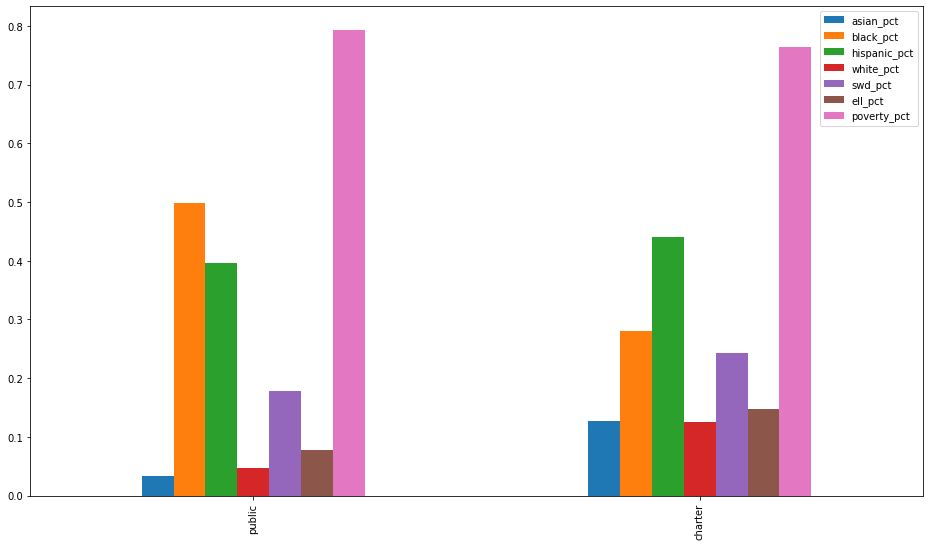

In [10]:
# easily make a grouped bar chart with built-in dataframe function
charter_dbn = charter.dbn.unique()
charter_dbn
cols = ["dbn"] + factors

chart = demo[demo.ay == 2020][cols].copy()

chart["school_type"] = chart.dbn.apply(lambda dbn:"charter" if dbn in charter_dbn else "public")

data = chart.groupby("school_type").agg("mean")
data = data.reset_index()

ax = data.plot.bar(figsize=(16,9))
ax.set_xticks(np.arange(2))

ax.set_xticklabels(["public", "charter"])
# plt.text(0,x=0,y=0,ha="center")

data

,demo_cat,public,charter
0,asian_pct,12.6,3.3
1,black_pct,28.0,49.8
2,ell_pct,14.8,7.7
3,hispanic_pct,44.0,39.6
4,poverty_pct,76.4,79.4
5,swd_pct,24.3,17.8
6,white_pct,12.5,4.7


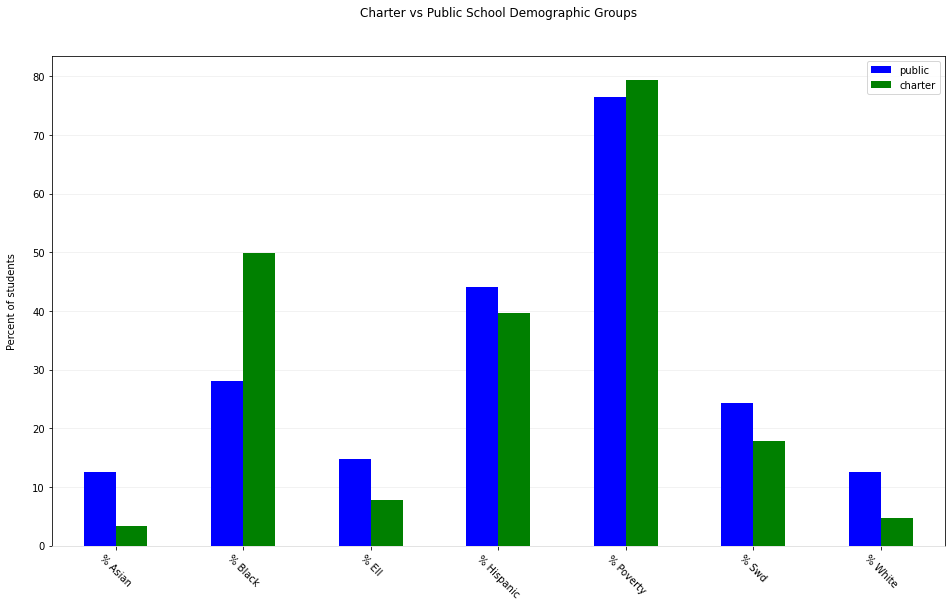

In [11]:
# problem is, we can't see side-by-side for charter vs public
# let's melt the data to make it easier
# pandas makes the group clusters based on rows with the values coming from the columns

# melt the public data into a new df and then group it to get the means in each category
pub = pd.melt(chart.query("school_type == 'public'"), id_vars=["dbn", "school_type"], value_vars=factors, var_name="demo_cat", value_name="public")
pub = pub[["demo_cat", "public"]].groupby("demo_cat").agg("mean")

# do the same for the charter data
charter = pd.melt(chart.query("school_type == 'charter'"), id_vars=["dbn", "school_type"], value_vars=factors, var_name="demo_cat", value_name="charter")
charter = charter[["demo_cat", "charter"]].groupby("demo_cat").agg("mean")

# join them back into a single dataframe for our chart
data = pub.join(charter, how="inner", on="demo_cat")
data = data.reset_index()

# make the percents 0-100 rather than 0-1
data.public = data.public.apply(lambda x: round(x*100, 1))
data.charter = data.charter.apply(lambda x: round(x*100, 1))

# plot the chart and get the axis so we can set titles and stuff
ax = data.plot.bar(figsize=(16,9), color=["blue", "green"])

# we could set these by hand if we wanted to
titles = [f"% {x.split('_')[0].title()}" for x in data.demo_cat]
ax.set_xticklabels(titles)

ax.set_ylabel("Percent of students", labelpad=15)
ax.set_title("Charter vs Public School Demographic Groups", pad=40)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#efefef')
sns.set_context('talk')
plt.xticks(rotation=-45)
pass

data

### Linear Regression: public schools

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       mean_scale_score   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     3657.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:35:40   Log-Likelihood:                -77083.
No. Observations:               22876   AIC:                         1.542e+05
Df Residuals:                   22867   BIC:                         1.543e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              611.0904      1.860    328.488      0.000     607.444     614.737
total_enrollment     0.0006      0.000      3.768      0.000       0.000       0.001
asian_pct           27.8467      2.083     13.366      0.000      23.763      31.930
black_pct           11.9563      2.040      5.860      0.000       7.957      15.955
hispanic_pct        17.4398      2.027      8.605      0.000      13.467      21.412
white_pct           17.1005      1.990      8.591      0.000      13.199      21.002
swd_pct            -53.7340      0.789    -68.075      0.000     -55.281     -52.187
ell_pct            -27.6419      0.607    -45.506      0.000     -28.833     -26.451
poverty_pct        -16.2563      0.506    -32.147      0.000     -17.247     -15.265
==============================================================================
Omnibus:                     2132.756   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4547.149
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                       4.826   Cond. No.                     6.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

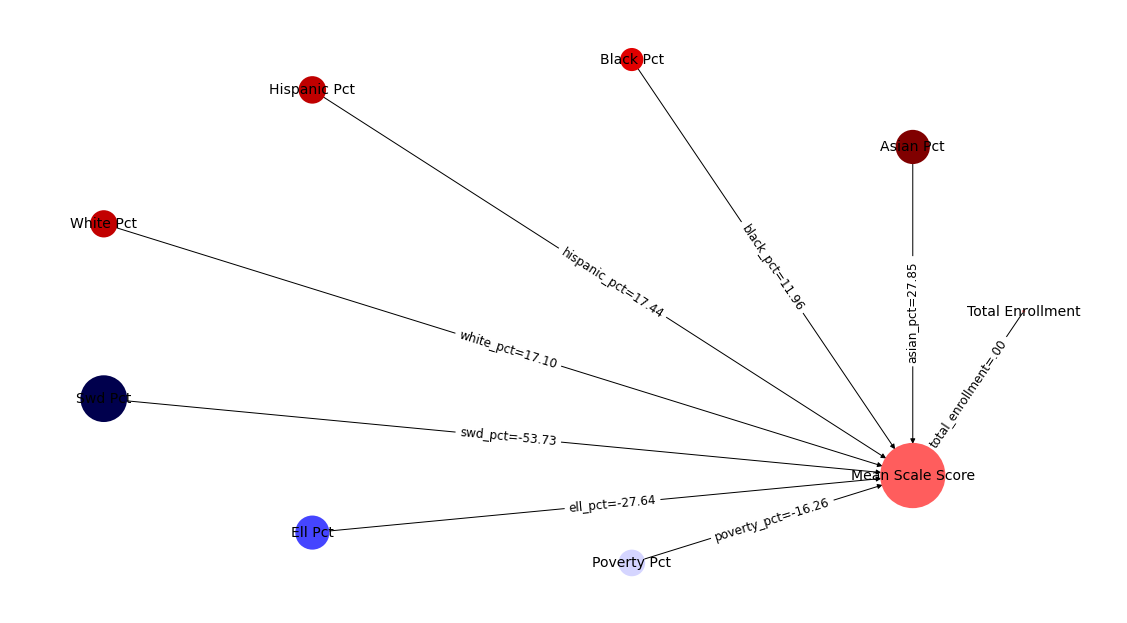

### Linear Regression: charter schools

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       mean_scale_score   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     162.4
Date:                Mon, 25 Apr 2022   Prob (F-statistic):          3.22e-236
Time:                        18:35:40   Log-Likelihood:                -13414.
No. Observations:                3818   AIC:                         2.685e+04
Df Residuals:                    3809   BIC:                         2.690e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              634.0868      9.036     70.170      0.000     616.370     651.804
total_enrollment     0.0060      0.000     12.293      0.000       0.005       0.007
asian_pct            6.3804     10.166      0.628      0.530     -13.552      26.313
black_pct           -6.4510      9.645     -0.669      0.504     -25.362      12.460
hispanic_pct         1.8186      9.525      0.191      0.849     -16.855      20.492
white_pct          -15.6179     10.080     -1.549      0.121     -35.381       4.145
swd_pct            -56.9569      2.188    -26.032      0.000     -61.247     -52.667
ell_pct            -31.3858      3.503     -8.958      0.000     -38.255     -24.517
poverty_pct        -20.0756      2.060     -9.744      0.000     -24.115     -16.036
==============================================================================
Omnibus:                      329.980   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.987
Skew:                           0.770   Prob(JB):                     3.83e-92
Kurtosis:                       3.521   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

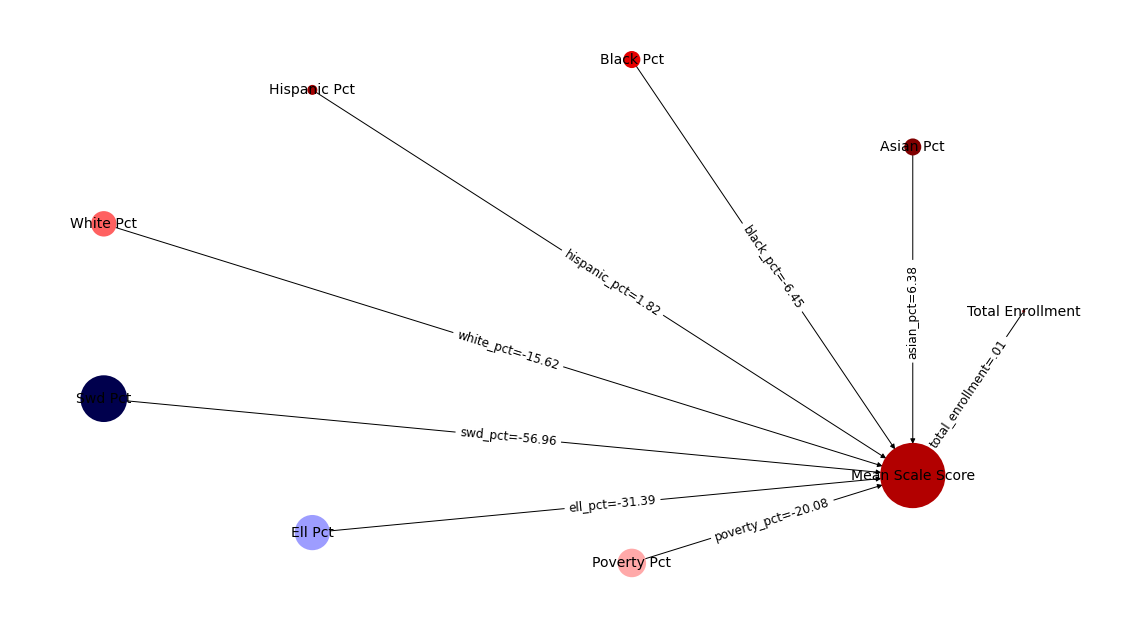

In [12]:
def show_ols(data, title):
    factors = ['total_enrollment', 'asian_pct',  'black_pct', 
       'hispanic_pct',  'white_pct','swd_pct',  'ell_pct',  'poverty_pct']

    
    y = data['mean_scale_score']

    X = data[factors]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    display(md(f"### {title}"))
    display(model.summary())

    ui.plot_model(model)

    
    
pub = df.query("charter == 0 and district <= 32")
charter = df.query("charter == 1")
data = df.query("category == 'All Students'").copy()
show_ols(data.copy(), "Linear Regression: public schools")
show_ols(charter.copy(), "Linear Regression: charter schools")

In [13]:
data = pub.query("category == 'All Students'").copy()

factors = ['total_enrollment', 'asian_pct',  'black_pct', 
   'hispanic_pct',  'white_pct','swd_pct',  'ell_pct',  'poverty_pct']


y = data['mean_scale_score']

X = data[factors]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [14]:
import matplotlib as mpl
import math
import networkx as nx

cmap = mpl.cm.seismic
# get the data we need from model
dv = model.model.endog_names

params = list(model.params.index.values[1:])
coefs = list(model.params.values[1:],)
pvalues = list(model.pvalues.round(3).values[1:])

nodes =  params + [dv]
plabels = [f"p={p}" for p in pvalues]
pnodes = list(zip(plabels, params))

# all targets point to the dv
targets =  [dv for _ in range(len(params))]
edges = list(zip(params, targets))
colors = coefs + [0]

weights =  [abs(c) for c in coefs]
weighted_edges = list(zip(params, targets, weights))

max_node = 2000
max_size = max(weights)
node_size = [math.ceil(max_node * (c/max_size)) for c in weights]
node_size.append(  max_node * 2 )

labels =  dict([(n, ui.nice_name(n)) for n in nodes])

edge_labels = dict([(x, ui.edge_label(x[0], y)) for x, y in zip(edges, coefs)])
pnodes

[('p=0.0', 'total_enrollment'),
 ('p=0.0', 'asian_pct'),
 ('p=0.096', 'black_pct'),
 ('p=0.02', 'hispanic_pct'),
 ('p=0.0', 'white_pct'),
 ('p=0.0', 'swd_pct'),
 ('p=0.0', 'ell_pct'),
 ('p=0.0', 'poverty_pct')]

{('p=0.0', 'total_enrollment'): True, ('p=0.0', 'asian_pct'): True, ('p=0.096', 'black_pct'): True, ('p=0.02', 'hispanic_pct'): True, ('p=0.0', 'white_pct'): True, ('p=0.0', 'swd_pct'): True, ('p=0.0', 'ell_pct'): True, ('p=0.0', 'poverty_pct'): True}


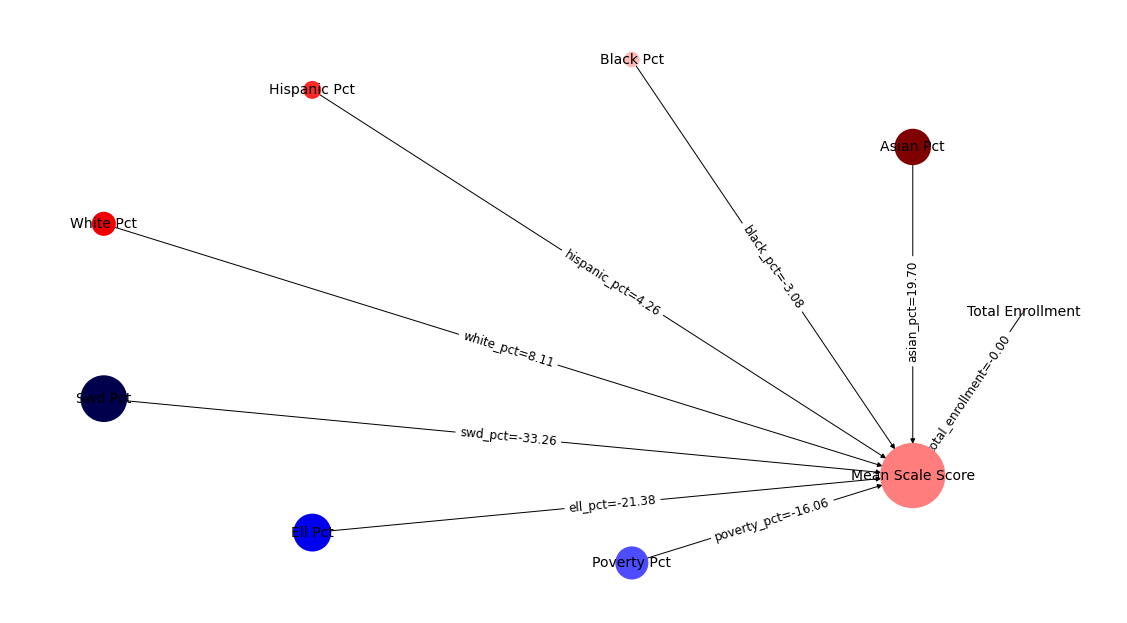

In [15]:
edges = weighted_edges
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

fig, ax = plt.subplots(figsize=(16,9))

# pos = nx.spring_layout(G, k=3)
pos = nx.circular_layout(G)

nx.draw(G, pos=pos, ax = ax, with_labels=True,
        labels=labels, node_color=colors, cmap=cmap, node_size=node_size,
        linewidths=2, min_source_margin=2, min_target_margin=2, font_size=14)

nx.draw_networkx_edge_labels(G,pos, ax=ax, edge_labels=edge_labels, label_pos=.5, font_size=12)

# adding p-values as node
G.add_nodes_from(pnodes, pval=True)
pv_nodes =  nx.get_node_attributes(G, "pval")
# nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=pv_nodes)

print(pv_nodes)
plt.tight_layout()
plt.margins(0.05)
plt.show()